In [ ]:
%pip install scattertext
%pip install spacy_cld


In [ ]:
%pip install spacymoji
%pip install empath
%pip install spacy_langdetect

In [ ]:
%pip install matplotlib

In [ ]:
%pip install TextBlob stopwords 

0it [00:00, ?it/s]

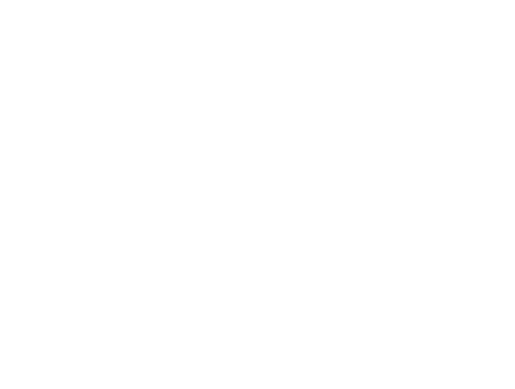

In [1]:
# library imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
width = 0.75
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.axis('off')
from nltk.corpus import stopwords
from textblob import TextBlob
import scattertext as st
import spacy
import spacy_cld

from IPython.display import IFrame
from IPython.display import display, HTML  
from collections import Counter
from tqdm import notebook as tqdm  # cool progress bars
tqdm.tqdm_notebook() # Enable tracking of progress in dataframe `apply` calls

In [2]:
tweets = pd.read_csv('twcs.csv',encoding='utf-8')
print(tweets.shape)
tweets.head()

(2811774, 7)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [3]:
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

QnR = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
QnR = QnR[QnR.inbound_y ^ True]
print(f'Data shape: {QnR.shape}')
QnR.head()

Data shape: (794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [4]:
# removing anonymized screen names 
def sn_replace(match):
    _sn = match.group(2).lower()
    if not _sn.isnumeric():
        # This is a company screen name
        return match.group(1) + match.group(2)
    return ''

sn_re = re.compile('(\W@|^@)([a-zA-Z0-9_]+)')
print("Removing anonymized screen names in X...")
QnR["text_x"] = QnR.text_x.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))
print("Removing anonymized screen names in Y...")
QnR["text_y"] = QnR.text_y.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))

Removing anonymized screen names in X...


  0%|          | 0/794299 [00:00<?, ?it/s]

Removing anonymized screen names in Y...


  0%|          | 0/794299 [00:00<?, ?it/s]

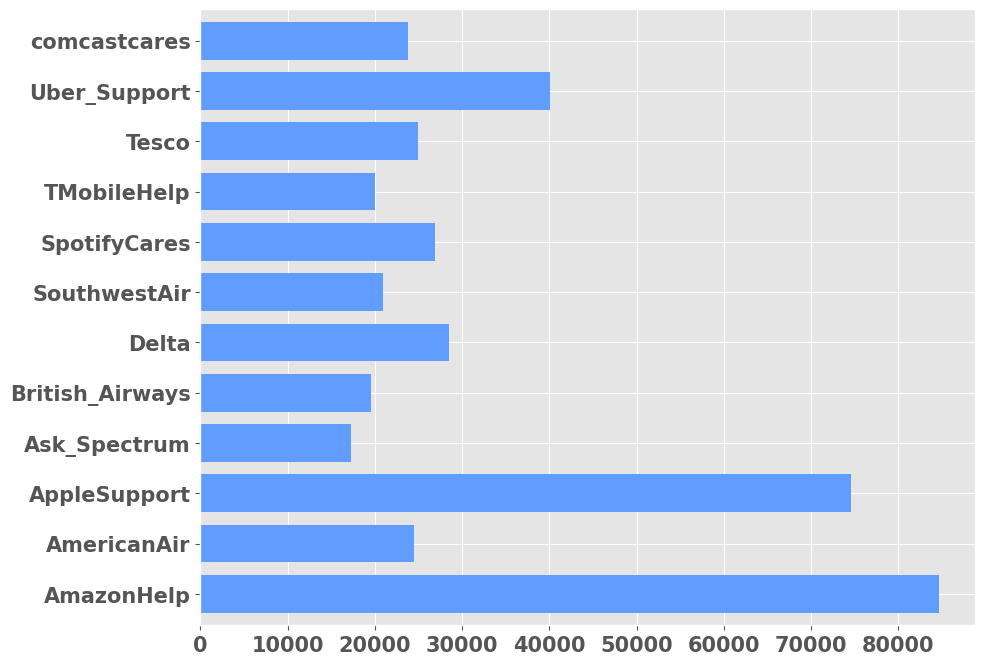

In [5]:
count = QnR.groupby("author_id_y")["text_x"].count()
c = count[count>15000].plot(kind='barh',figsize=(10, 8), color='#619CFF', zorder=2, width=width,)
c.set_ylabel('')
plt.show()

In [6]:
spacy.cli.download("en_core_web_sm")

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
nlp_cld = spacy.load('en_core_web_sm')

In [39]:
from spacy_langdetect import LanguageDetector
from spacy.language import Language

@Language.factory('cld_language_detector')
def language_detector(nlp, name):
    return spacy_cld.LanguageDetector()

In [9]:
language_detector = spacy_cld.LanguageDetector()

In [10]:
AppleQnR = QnR[QnR["author_id_y"]=="AppleSupport"]

In [11]:
doc = nlp_cld(AppleQnR.iloc[100]["text_x"])

print(doc)
print(doc._.languages)  
print(doc._.language_scores)

My iPhone is so damn glitchy, not sure this upgrade to the 8 was worth it. I can’t even send pictures 😡 @AppleSupport
['en']
{'en': 0.99}


In [12]:
from tqdm import tqdm_notebook


mask = []
try:
    for i,doc in tqdm_notebook(enumerate(nlp_cld.pipe(AppleQnR["text_x"], batch_size=512))):
            if 'en' not in doc._.languages or len(doc._.languages) != 1:
                mask.append(False)
            else:
                mask.append(True)
except Exception:
    print("excepted ")

/tmp/ipykernel_136795/2306739620.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,doc in tqdm_notebook(enumerate(nlp_cld.pipe(AppleQnR["text_x"], batch_size=512))):


0it [00:00, ?it/s]

In [13]:
AppleQnR = AppleQnR[mask]
# sample a random fraction to visually ensure that we have only English tweets
AppleQnR.sample(frac=0.0002)   

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
619240,2151171,632195,True,Thu Nov 09 01:13:53 +0000 2017,.@AppleSupport when are you guys going to fix ...,2151170,NaN,2151170,AppleSupport,False,Thu Nov 09 01:30:00 +0000 2017,Here’s what you can do to work around the iss...,NaN,2151171.0
310075,1132802,386934,True,Thu Nov 30 18:23:00 +0000 2017,"Battery life on my MacBook Air is trash now, w...",1132801,NaN,1132801,AppleSupport,False,Thu Nov 30 18:45:31 +0000 2017,We'd love to help find the best solution so y...,NaN,1132802.0
192177,711664,290194,True,Tue Oct 10 21:02:02 +0000 2017,@AppleSupport is this email as bogus as I thin...,711663,NaN,711663,AppleSupport,False,Tue Oct 10 21:48:00 +0000 2017,You are right to question this email. Here's ...,NaN,711664.0
536926,1903559,567286,True,Wed Oct 18 11:38:22 +0000 2017,The most annoying bug in iOS 11\n#iphone #app...,1903558,NaN,1903558,AppleSupport,False,Wed Oct 18 13:51:45 +0000 2017,We're here to help. Let's take this to DM so ...,NaN,1903559.0
484192,1741605,525416,True,Tue Nov 07 14:27:22 +0000 2017,Ok what is up with this??? Like how do we fix ...,1741604,NaN,1741604,AppleSupport,False,Tue Nov 07 17:22:35 +0000 2017,Here’s what you can do to work around the iss...,NaN,1741605.0
726424,2500957,713449,True,Wed Nov 15 18:59:22 +0000 2017,@AppleSupport how do I change my restrictions ...,2500956,NaN,2500956,AppleSupport,False,Wed Nov 15 19:14:34 +0000 2017,Check out this link for the steps to change y...,NaN,2500957.0
801330,2746172,769030,True,Mon Nov 20 21:59:43 +0000 2017,@AppleSupport I took screenshots every time #i...,2746171,NaN,2746171,AppleSupport,False,Mon Nov 20 22:07:00 +0000 2017,That's not the experience we'd hope you have....,NaN,2746172.0
276197,1014404,360031,True,Sat Oct 14 14:10:24 +0000 2017,@AppleSupport yesterday your systems were down...,1014403,NaN,1014403,AppleSupport,False,Sat Oct 14 15:03:00 +0000 2017,You would need to reach out to the store to f...,NaN,1014404.0
484416,1742387,525583,True,Tue Nov 07 05:26:11 +0000 2017,What happened to iOS? Haven’t had this many gl...,1742386,NaN,1742386,AppleSupport,False,Tue Nov 07 14:29:32 +0000 2017,We'd love to help with any issues you're expe...,NaN,1742387.0
193796,717215,291708,True,Tue Oct 10 23:55:03 +0000 2017,@AppleSupport - major issues w iOS 11.0.2: ter...,717214,NaN,717214,AppleSupport,False,Wed Oct 11 00:43:30 +0000 2017,We'll gladly assist. What device are you runn...,NaN,717215.0


In [14]:
AppleQnR.tail(10)["text_x"]

875031    Before installing iOS 11 on my iPhone, I could...
875032    Travelled over an hour to Store to get repairs...
875065    @AppleSupport pretty much all of my photos hav...
875102    What does this mean please @AppleSupport ‘cann...
875103    @AppleSupport why is my iPhone 7 constantly se...
875110    anyone having issues with #osx #HighSierra and...
875147    Hey @AppleSupport - not being able to duplicat...
875148    Yo @AppleSupport is that weird glitch w/ the c...
875171    What the fuck @AppleSupport  my phone keeps ha...
875199    Is anyone having #iphone issues with there pho...
Name: text_x, dtype: object

In [15]:
spacy.cli.download("en_core_web_lg")

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 4.7 MB/s eta 0:00:0000:0100:01


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [18]:
from spacymoji import Emoji
@Language.factory('emoji2')
def language_detector(nlp, name):
    return Emoji()

In [19]:
nlp = spacy.load("en_core_web_lg")

emoji = Emoji(nlp)
nlp.add_pipe('emoji2', first=True)

TypeError: Emoji.__init__() missing 1 required positional argument: 'nlp'

In [21]:
emojis = []
for doc in tqdm_notebook(nlp.pipe(AppleQnR["text_x"], batch_size=512, disable=["tagger"])):
    if doc._.has_emoji:
        for e in doc._.emoji:
            emojis.extend(e[0])

/tmp/ipykernel_136795/803104660.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(nlp.pipe(AppleQnR["text_x"], batch_size=512, disable=["tagger"])):


0it [00:00, ?it/s]

/home/i4624/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [22]:
eCount = Counter(emojis)
eCount.most_common(20)

[]

In [24]:
AppleSupport =QnR[(QnR["author_id_y"]=="AppleSupport")]
AppleSupport.head(4)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
119,714,115856,True,Tue Oct 31 22:19:32 +0000 2017,Hey @AppleSupport and anyone else who upgraded...,"712,715",NaN,712,AppleSupport,False,Tue Oct 31 22:26:29 +0000 2017,"Hey, let's work together to figure out what's...",713,714.0
120,719,115857,True,Tue Oct 31 22:01:50 +0000 2017,Tf is wrong with my keyboard,718,NaN,718,AppleSupport,False,Tue Oct 31 22:05:00 +0000 2017,"Fill us in on what is happening, then we can ...",717,719.0
121,723,115859,True,Tue Oct 31 22:11:16 +0000 2017,@AppleSupport hello are all the lines closed ...,722,NaN,722,AppleSupport,False,Tue Oct 31 22:17:30 +0000 2017,What's going on? We're hapy to help if we can...,721,723.0
122,730,115861,True,Tue Oct 31 20:46:35 +0000 2017,"Hello, internet. Can someone explain why this ...","729,731",NaN,729,AppleSupport,False,Tue Oct 31 20:55:34 +0000 2017,You're in the right place; we'll do all we ca...,728,730.0


In [41]:
import scattertext as st
from spacy.tokens import Doc
Doc.remove_extension('cld_language_detector')

ValueError: [E046] Can't retrieve unregistered extension attribute 'cld_language_detector'. Did you forget to call the `set_extension` method?

In [48]:
@Language.factory('language_detector2')
def language_detector2(nlp, name):
    return spacy_cld.LanguageDetector()

In [50]:
nlp.factory

<bound method Language.factory of <class 'spacy.lang.en.English'>>

In [58]:
nlp.add_pipe('language_detector2')

ValueError: [E090] Extension 'languages' already exists on Doc. To overwrite the existing extension, set `force=True` on `Doc.set_extension`.

In [51]:


AppleSupport['parsed'] = AppleSupport.text_y.progress_apply(nlp)

  0%|          | 0/74632 [00:00<?, ?it/s]

/tmp/ipykernel_136795/1979507975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AppleSupport['parsed'] = AppleSupport.text_y.progress_apply(nlp)


In [59]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [64]:
AppleSupport['parsed'].head()

119    ( , Hey, ,, let, 's, work, together, to, figur...
120    ( , Fill, us, in, on, what, is, happening, ,, ...
121    ( , What, 's, going, on, ?, We, 're, hapy, to,...
122    ( , You, 're, in, the, right, place, ;, we, 'l...
123    ( , Go, ahead, and, send, us, a, DM, please, ....
Name: parsed, dtype: object

In [53]:
corpus = st.CorpusFromParsedDocuments(AppleSupport,
                             category_col='author_id_y',
                             parsed_col='parsed').build()

In [56]:
html = st.produce_scattertext_explorer(corpus,
          category='AppleSupport',
          category_name='AppleSupport',
          width_in_pixels=600,
          minimum_term_frequency=10,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
          )

In [57]:
# uncomment this cell to load the interactive scattertext visualisation
filename = "applesupport2.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 800, height=700)

In [60]:
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(AppleSupport,
                                              category_col='author_id_y',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='parsed').build()

In [61]:
html = st.produce_scattertext_explorer(empath_corpus,
                                        category='AppleSupport',
                                        category_name='AppleSupport',
                                        width_in_pixels=700,
                                        metadata=AppleSupport['author_id_y'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())


In [63]:
# uncomment this cell to load the interactive scattertext visualisation
filename = "empath-Apple.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 900, height=700)